In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")


In [147]:
df.head(5)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,forecast
0,01/01/2020,1325,2312,0,2586,0,1.0,0.000000
1,01/01/2021,1256,2434,0,2608,0,13.0,700.550287
2,01/01/2022,1028,1653,0,2245,0,9.0,881.305028
3,01/01/2023,1364,2406,0,3178,0,4.0,908.489349
4,01/01/2024,1481,2740,0,3308,0,6.0,1020.499246


In [109]:
df.tail(10)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1908,13/07/2023,11556,9933,312,16001,0,52.0
1909,24/09/2021,2510,1025,16,2530,0,26.0
1910,14/04/2024,2704,4861,0,6791,0,19.0
1911,14/11/2022,13895,8761,271,15661,4206,54.0
1912,28/09/2020,8822,6028,200,10349,0,28.0
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0
1917,26/07/2023,16680,11726,347,20438,4738,99.0


In [110]:
df.columns

Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')

In [124]:
df.dtypes

,0
Local Route,int64
Light Rail,int64
Peak Service,int64
Rapid Route,int64
School,int64
Other,float64


In [111]:
df.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [112]:
df['Other']=df['Other'].fillna(df['Other'].mean())

In [113]:
df.sort_values('Date',inplace=True)

In [114]:
df.set_index('Date',inplace=True)

In [115]:
df.isnull().sum()

,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,0


In [116]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
01/01/2020,1325,2312,0,2586,0,1.0
01/01/2021,1256,2434,0,2608,0,13.0
01/01/2022,1028,1653,0,2245,0,9.0
01/01/2023,1364,2406,0,3178,0,4.0
01/01/2024,1481,2740,0,3308,0,6.0


In [148]:
service_cols = ['Local Route', 'Light Rail', 'Peak Service',
                'Rapid Route', 'School', 'Other']

df_long = df.melt(id_vars='Date',
                  value_vars=service_cols,
                  var_name='Service_Type',
                  value_name='Passenger_Journeys')


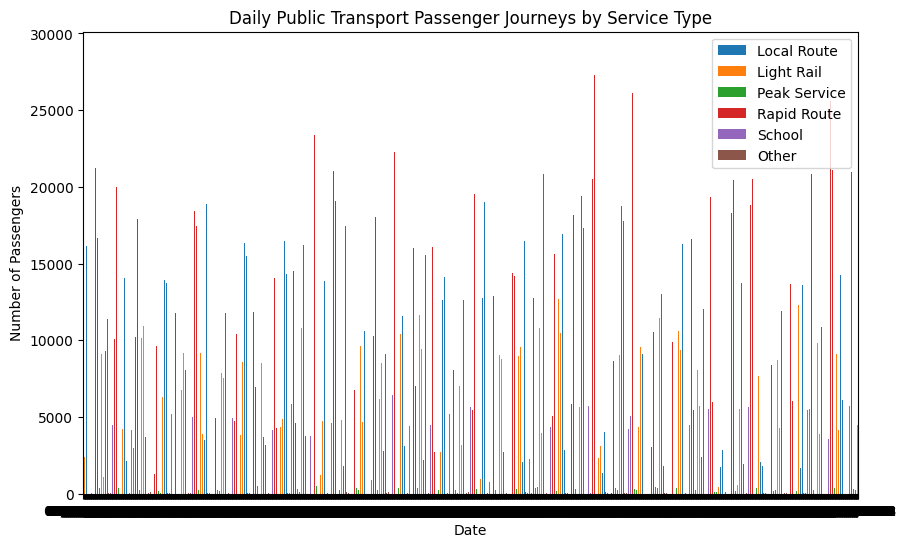

In [117]:
df[['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']].plot(kind='bar',figsize=(10, 6))
plt.xticks(rotation=0)
plt.title('Daily Public Transport Passenger Journeys by Service Type')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [127]:
df = df.reset_index()


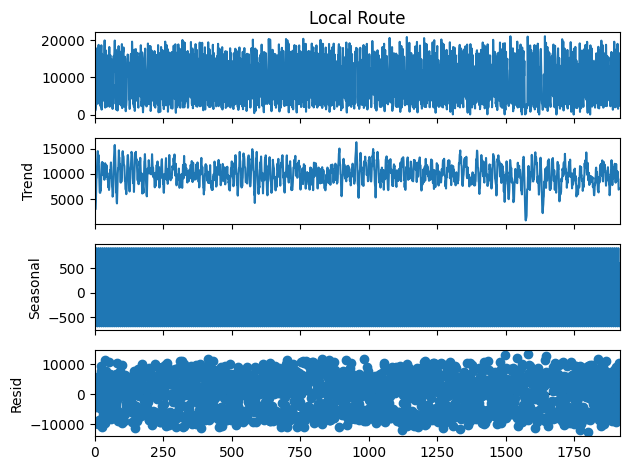

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Local Route'],model='additive',period=7)
result.plot()
plt.show()

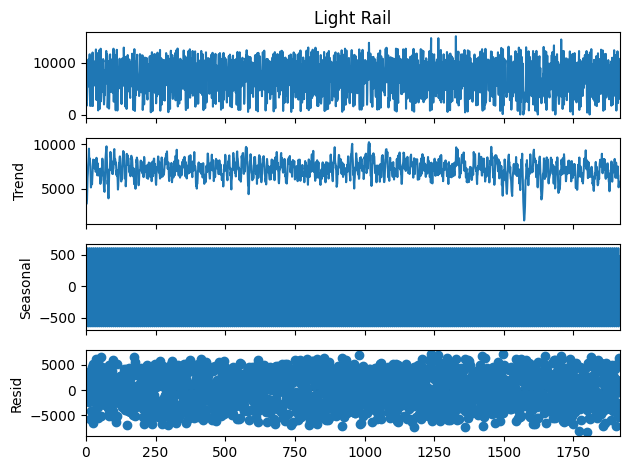

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Light Rail'],model='additive',period=7)
result.plot()
plt.show()

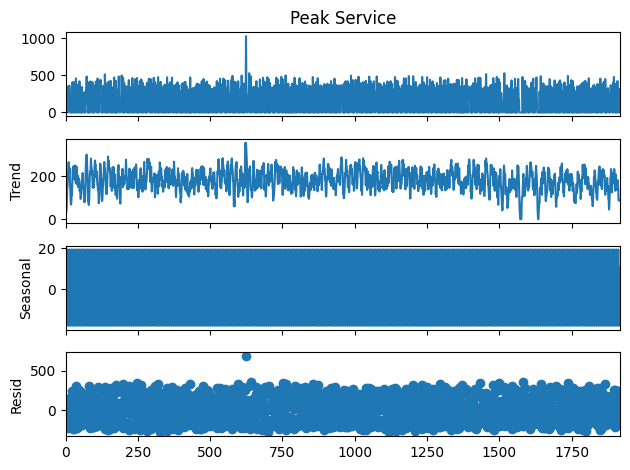

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Peak Service'],model='additive',period=7)
result.plot()
plt.show()

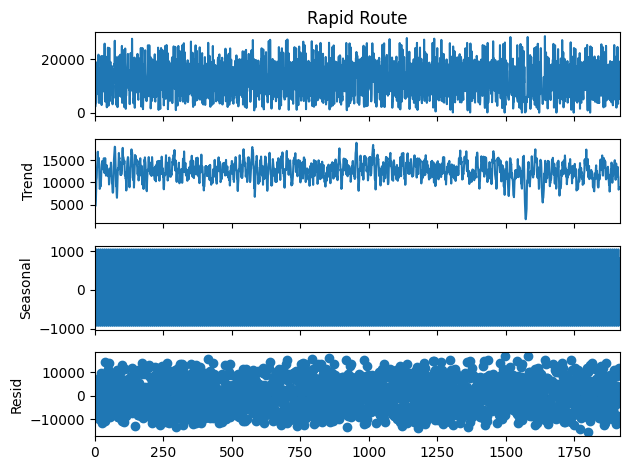

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Rapid Route'],model='additive',period=7)
result.plot()
plt.show()

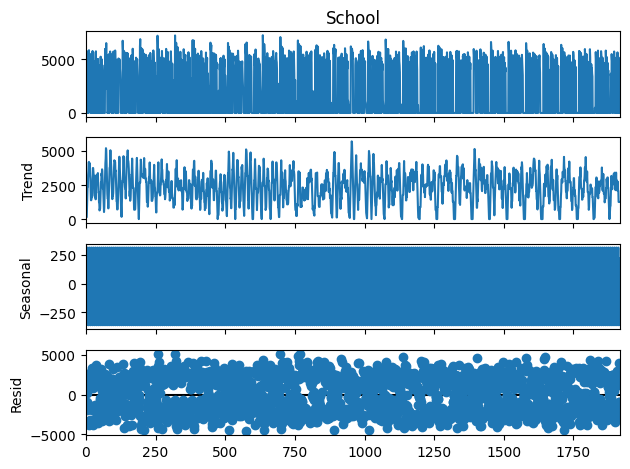

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['School'],model='additive',period=7)
result.plot()
plt.show()

In [ ]:
!pip install statsmodels

In [134]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Local Route'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')

ADF Statistic:  -8.890776771804605
p-value:  1.244243331243063e-14
The series is stationary.


In [135]:
result=adfuller(df['Light Rail'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')


ADF Statistic:  -8.897618052250879
p-value:  1.1950613728457757e-14
The series is stationary.


In [136]:
result=adfuller(df['Peak Service'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')

ADF Statistic:  -8.133883685442488
p-value:  1.0720675038492788e-12
The series is stationary.


In [ ]:
result=adfuller(df['School'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')

In [137]:
result=adfuller(df['Rapid Route'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')

ADF Statistic:  -8.734270496669813
p-value:  3.1309584980249044e-14
The series is stationary.


In [138]:
result=adfuller(df['Other'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
if result[1] <= 0.05:
    print('The series is stationary.')
else:
  print('The series is non-stationary.')

ADF Statistic:  -10.309712569090458
p-value:  3.2091409998255355e-18
The series is stationary.


In [139]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Local Route'],order=(1,1,1),seasonal_order=(1,1,1,7))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       Local Route   No. Observations:                 1918
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -19380.240
Date:                           Wed, 03 Dec 2025   AIC                          38770.481
Time:                                   05:48:04   BIC                          38798.255
Sample:                                        0   HQIC                         38780.703
                                          - 1918                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0451      0.022      2.029      0.042       0.002       0.089
ma.L1         -1.0000      1.363     -0.734      0.463      -3.671       1.671
ar.S.L7       -0.0739      0.024     -3.020      0.003      -0.122      -0.026
ma.S.L7       -1.0000      1.367     -0.731      0.465      -3.679       1.680
sigma2      3.691e+07   3.69e-08      1e+15      0.000    3.69e+07    3.69e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               158.00
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.09
Prob(H) (two-sided):                  0.51   Kurtosis:                         1.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.09e+32. Standard errors may be unstable.
"""

In [140]:
df.shape

(1918, 7)

<Axes: >

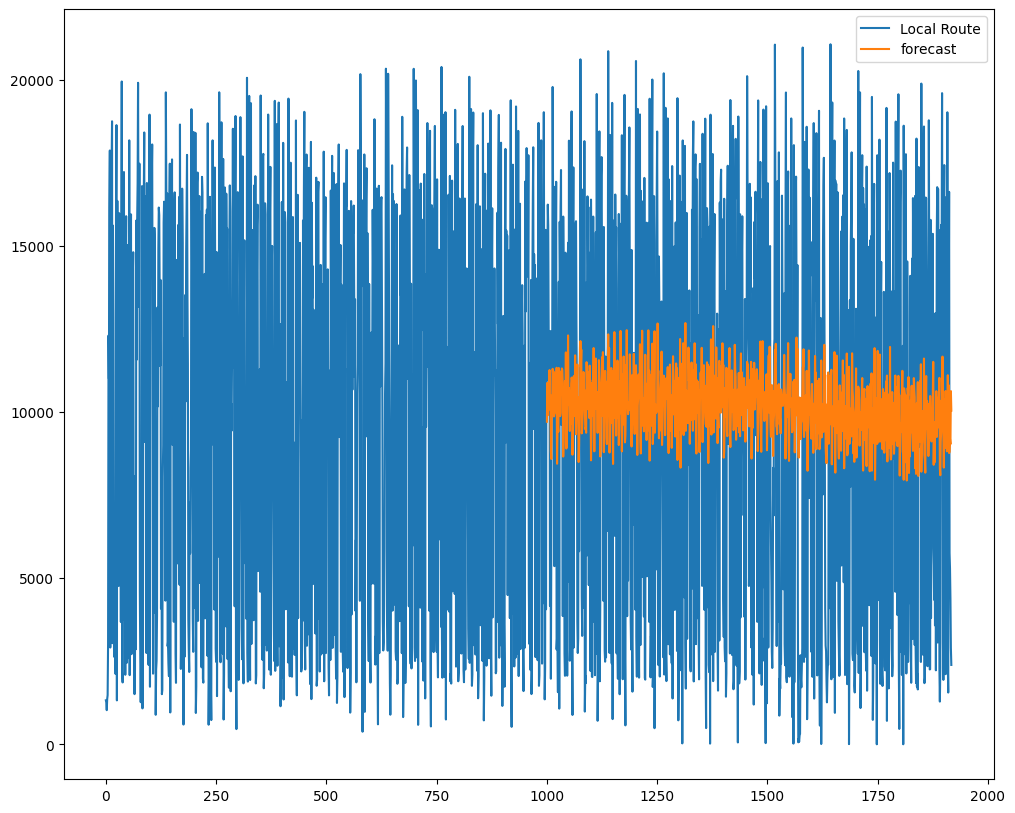

In [141]:
df['forecast']=results.predict(start=1000,end=1917)
df[['Local Route','forecast']].plot(figsize=(12,10))

<Axes: >

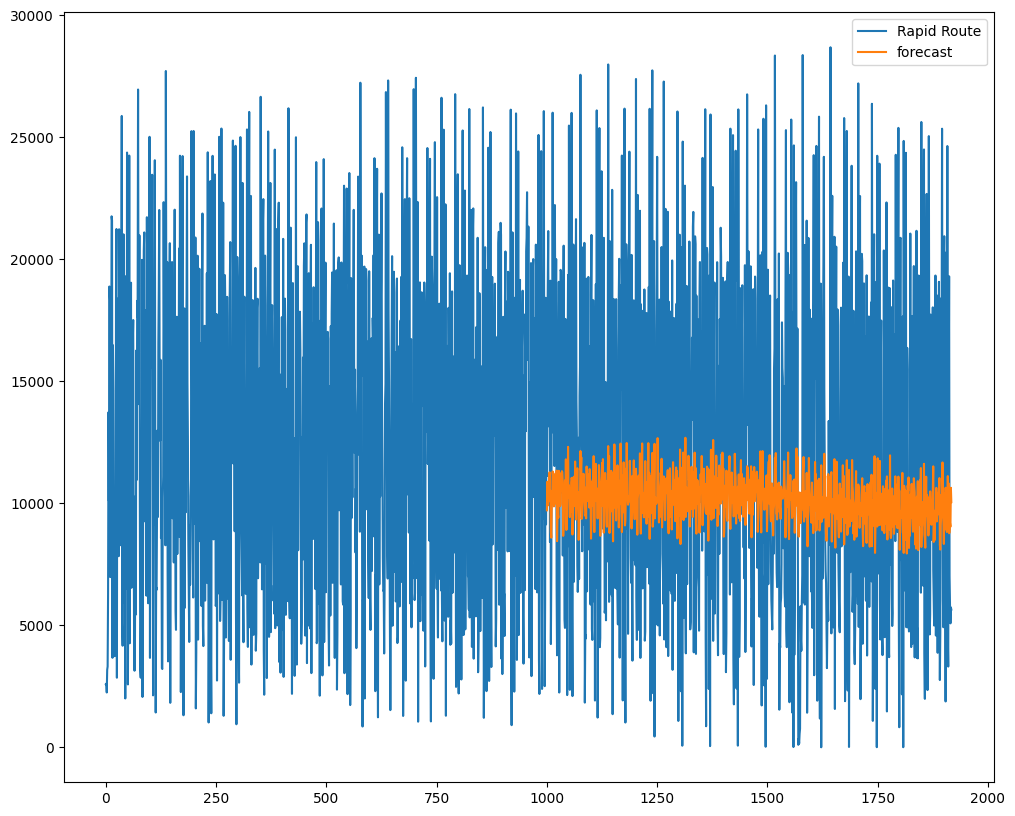

In [142]:
df['forecast']=results.predict(start=1000,end=1917)
df[['Rapid Route','forecast']].plot(figsize=(12,10))

<Axes: >

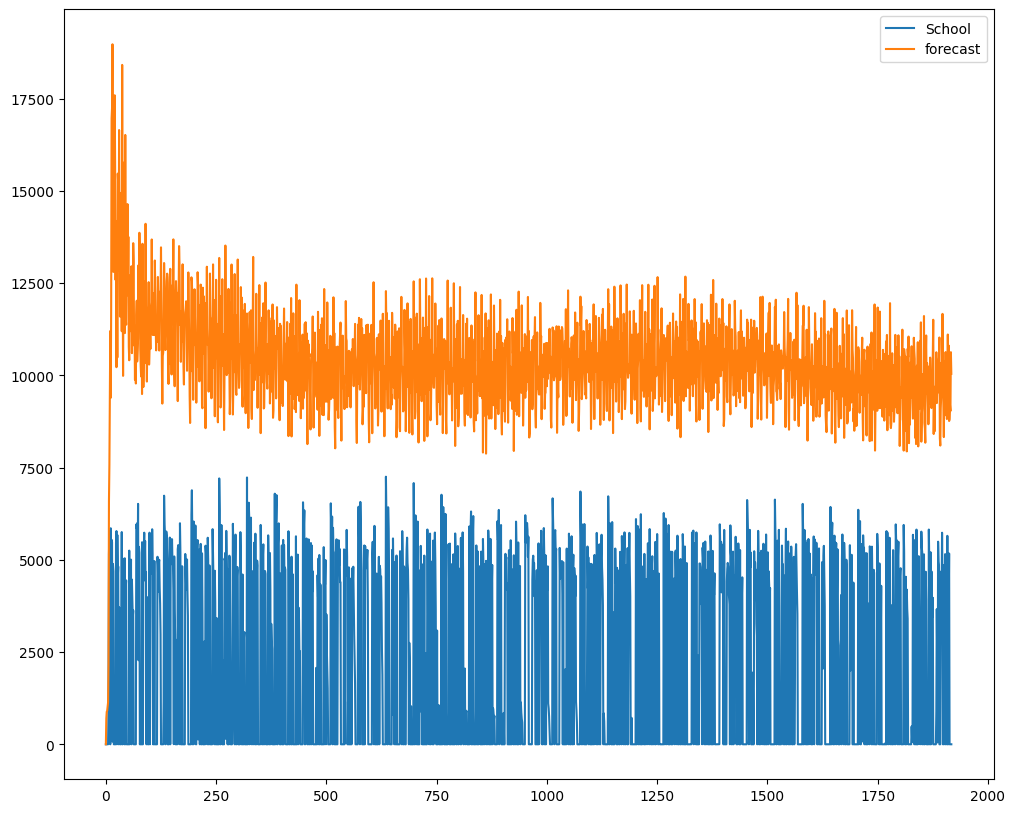

In [143]:
df['forecast']=results.predict(start=0,end=1917)
df[['School','forecast']].plot(figsize=(12,10))

In [ ]:
!pip install DateOffset

In [152]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date')


In [153]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 25)]
future_dates = pd.DatetimeIndex(future_dates)
future_dates


DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq=None)

In [157]:
future_forecast = results.predict(periods=24)


In [158]:
future_df = pd.DataFrame(index=future_dates, data=future_forecast, columns=['forecast'])
future_df


,forecast
2024-01-31,NaN
2024-02-29,NaN
2024-03-31,NaN
2024-04-30,NaN
2024-05-31,NaN
2024-06-30,NaN
2024-07-31,NaN
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN


In [159]:
final_df = pd.concat([df, future_df], axis=0)


/tmp/ipython-input-1863136800.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df, future_df], axis=0)


In [160]:
print(final_df.tail(30))

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
2023-10-31      16627.0     10852.0         325.0      19294.0  5172.0   56.0   
2019-12-31       5756.0      4911.0          30.0       7016.0     0.0    1.0   
2020-12-31       5296.0      4955.0          12.0       5831.0     0.0   34.0   
2021-12-31       4379.0      3044.0          17.0       5077.0     0.0   12.0   
2022-12-31       2897.0      4459.0           0.0       5731.0     0.0   22.0   
2023-12-31       2389.0      4620.0           0.0       5641.0     0.0    8.0   
2024-01-31          NaN         NaN           NaN          NaN     NaN    NaN   
2024-02-29          NaN         NaN           NaN          NaN     NaN    NaN   
2024-03-31          NaN         NaN           NaN          NaN     NaN    NaN   
2024-04-30          NaN         NaN           NaN          NaN     NaN    NaN   
2024-05-31          NaN         NaN           NaN          NaN     NaN    NaN   
2024-06-30          NaN     

In [161]:
train_size = int(len(df) * 0.8)

train = df.iloc[:train_size]
test  = df.iloc[train_size:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1534, 7)
Test shape: (384, 7)


In [182]:
train_series1 = train['Local Route']
test_series1  = test['Local Route']
print("Train size:", train_series1.shape)
print("Test size :", test_series1.shape)

Train size: (1534,)
Test size : (384,)


In [183]:
train_series2 = train['Light Rail']
test_series2  = test['Light Rail']
print("Train size:", train_series2.shape)
print("Test size :", test_series2.shape)

Train size: (1534,)
Test size : (384,)


In [184]:
train_series3 = train['Rapid Route']
test_series3  = test['Rapid Route']
print("Train size:", train_series3.shape)
print("Test size :", test_series3.shape)

Train size: (1534,)
Test size : (384,)


In [185]:
train_series4 = train['School']
test_series4  = test['School']
print("Train size:", train_series4.shape)
print("Test size :", test_series4.shape)

Train size: (1534,)
Test size : (384,)


In [186]:
train_series5 = train['Other']
test_series5  = test['Other']
print("Train size:", train_series5.shape)
print("Test size :", test_series5.shape)

Train size: (1534,)
Test size : (384,)


In [187]:
forecast = results.predict(start=len(train_series),
                                 end=len(train_series)+len(test_series)-1,
                                 dynamic=False)

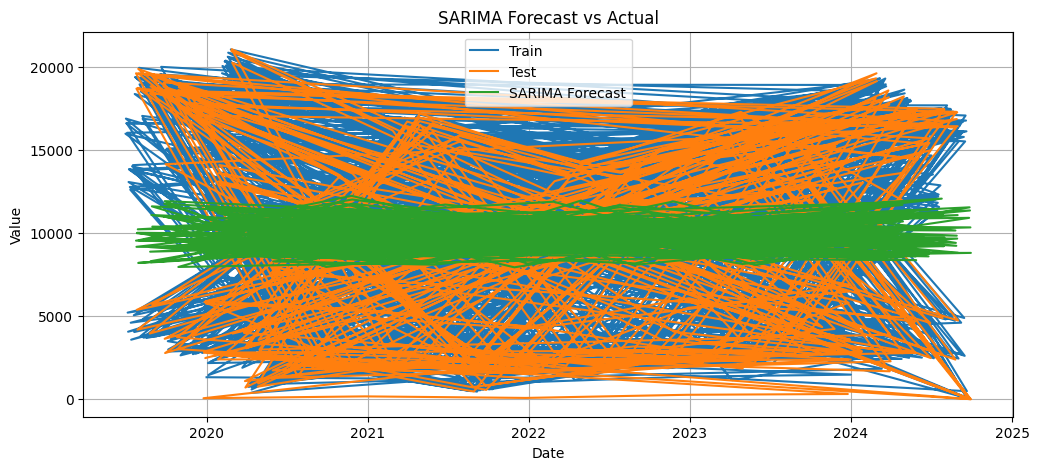

In [188]:
plt.figure(figsize=(12,5))
plt.plot(train_series1.index, train_series1, label="Train")
plt.plot(test_series1.index, test_series1, label="Test")
plt.plot(test_series1.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train_series1.index, train_series1, label="Train")
plt.plot(test_series1.index, test_series1, label="Test")
plt.plot(test_series1.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

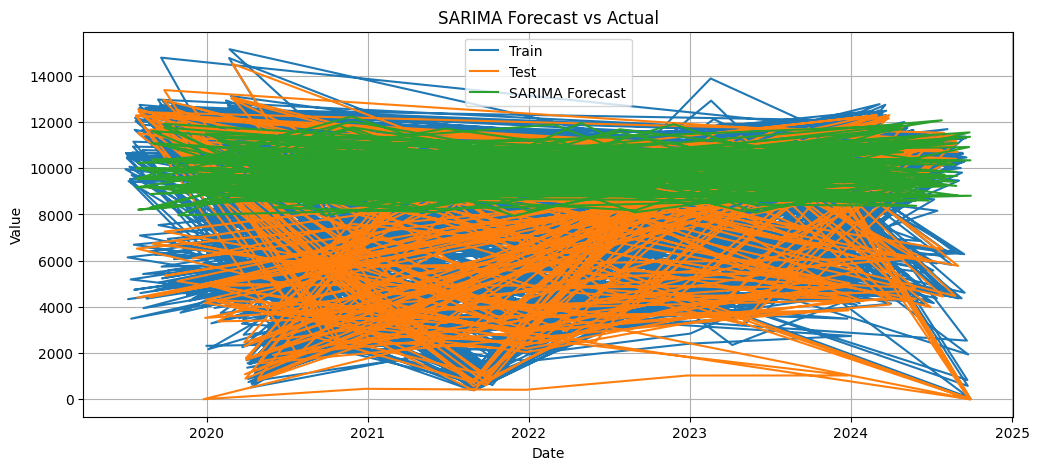

In [193]:
plt.figure(figsize=(12,5))
plt.plot(train_series2.index, train_series2, label="Train")
plt.plot(test_series2.index, test_series2, label="Test")
plt.plot(test_series2.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

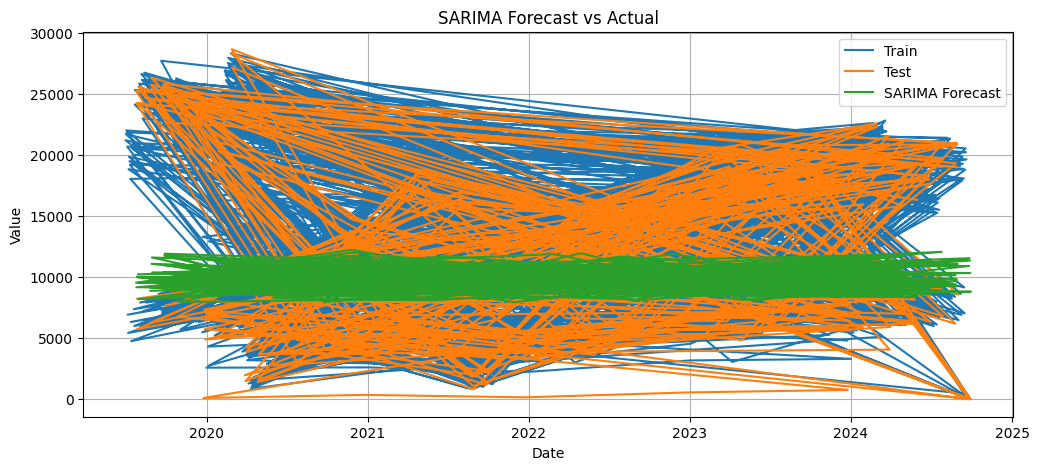

In [194]:
plt.figure(figsize=(12,5))
plt.plot(train_series3.index, train_series3, label="Train")
plt.plot(test_series3.index, test_series3, label="Test")
plt.plot(test_series3.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

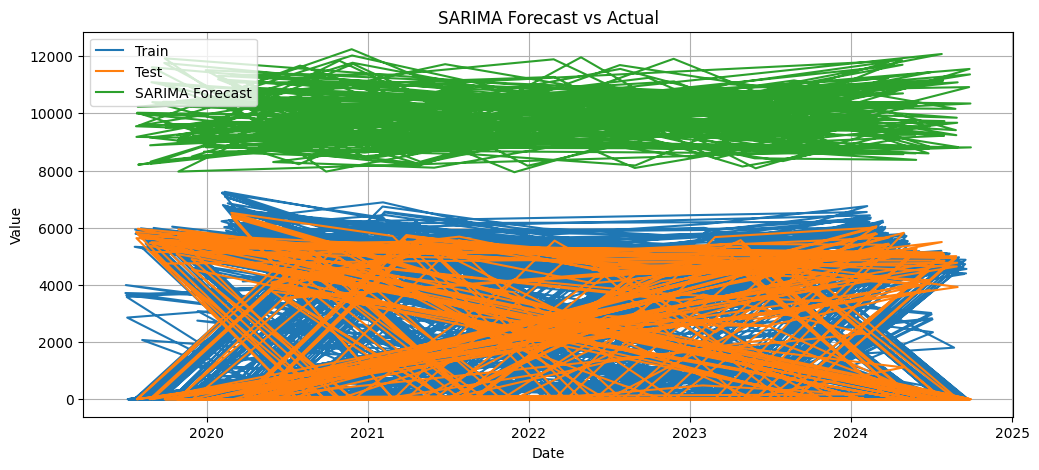

In [195]:
plt.figure(figsize=(12,5))
plt.plot(train_series4.index, train_series4, label="Train")
plt.plot(test_series4.index, test_series4, label="Test")
plt.plot(test_series4.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

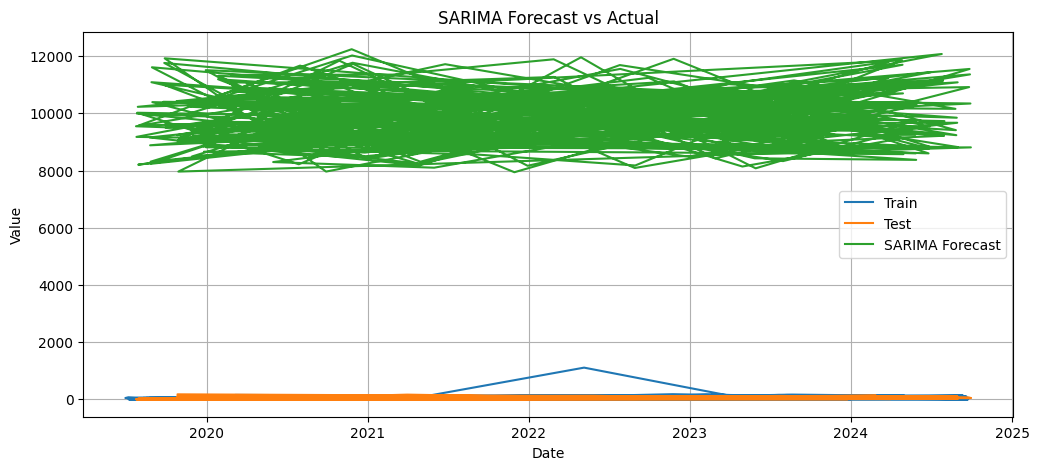

In [196]:
plt.figure(figsize=(12,5))
plt.plot(train_series5.index, train_series5, label="Train")
plt.plot(test_series5.index, test_series5, label="Test")
plt.plot(test_series5.index, forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae  = mean_absolute_error(test_series1, forecast)
mape = mean_absolute_percentage_error(test_series1, forecast)
rmse = np.sqrt(mean_squared_error(test_series1, forecast))
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 5771.354312666626
MAPE: 61.97680100143356
RMSE: 6361.467780751661


In [189]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae  = mean_absolute_error(test_series2, forecast)
mape = mean_absolute_percentage_error(test_series2, forecast)
rmse = np.sqrt(mean_squared_error(test_series2, forecast))
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 3833.4889570138707
MAPE: 7.251540030292219e+17
RMSE: 4691.204975028534


In [190]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae  = mean_absolute_error(test_series3, forecast)
mape = mean_absolute_percentage_error(test_series3, forecast)
rmse = np.sqrt(mean_squared_error(test_series3, forecast))
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 6228.369631529708
MAPE: 1.3549285107260902e+17
RMSE: 7313.261865652691


In [191]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae  = mean_absolute_error(test_series4, forecast)
mape = mean_absolute_percentage_error(test_series4, forecast)
rmse = np.sqrt(mean_squared_error(test_series4, forecast))
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 7633.862522150793
MAPE: 2.1174832699076334e+19
RMSE: 8053.579193044125


In [192]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae  = mean_absolute_error(test_series5, forecast)
mape = mean_absolute_percentage_error(test_series5, forecast)
rmse = np.sqrt(mean_squared_error(test_series5, forecast))
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 9817.74863445102
MAPE: 4.2216197564573394e+18
RMSE: 9861.150232951491


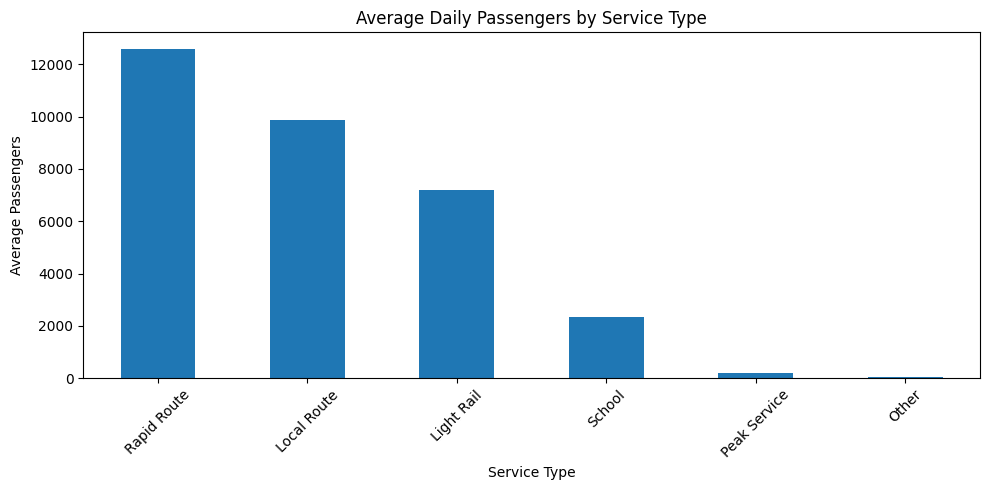

In [197]:
plt.figure(figsize=(10,5))
df[service_cols].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Daily Passengers by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Average Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [207]:
import pandas as pd
import matplotlib.pyplot as plt


df.index = pd.to_datetime(df.index)

service_cols = df.columns

plt.figure(figsize=(10,5))
df[service_cols].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Daily Passengers by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Average Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: Could not convert ['WeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekdayWeekendWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekendWeekdayWeekdayWeekendWeekdayWeekdayWeekdayWeekdayWeekendWeekdayWeekendWeekendWeekdayWeekdayWeekdayWeekdayWeekdayWeekendWeekend'] to numeric

<Figure size 1000x500 with 0 Axes>

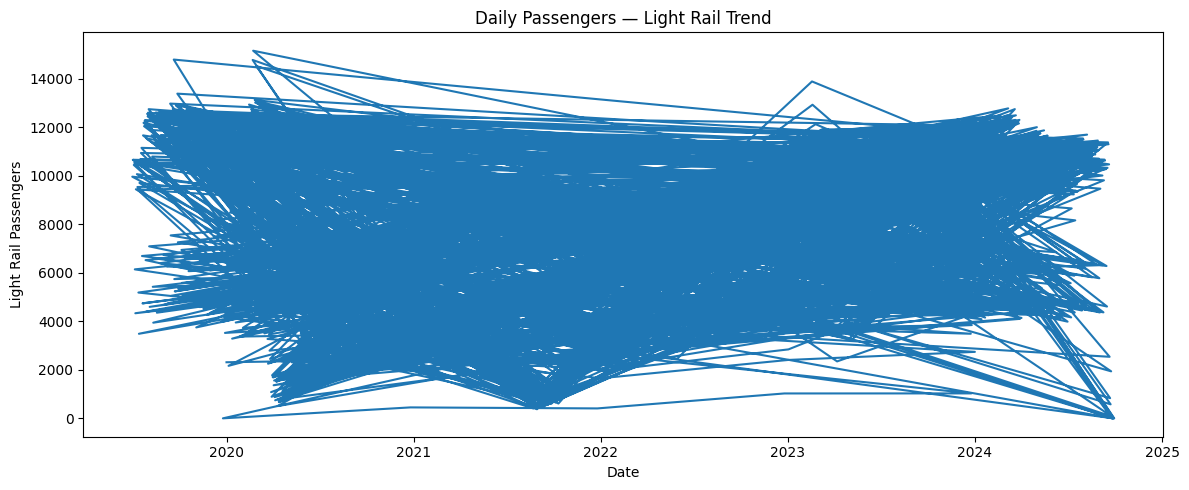

In [203]:

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Light Rail'])
plt.title("Daily Passengers — Light Rail Trend")
plt.xlabel("Date")
plt.ylabel("Light Rail Passengers")
plt.tight_layout()
plt.show()

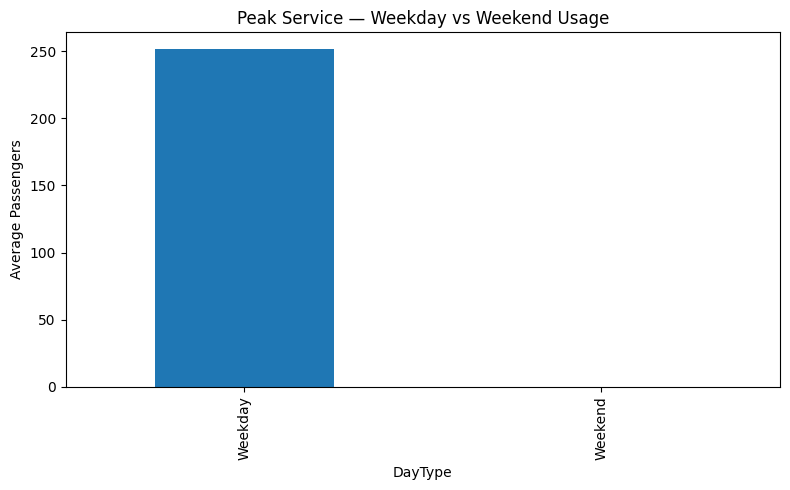

In [202]:
df['DayType'] = df.index.dayofweek.map(lambda x: "Weekday" if x < 5 else "Weekend")

plt.figure(figsize=(8,5))
df.groupby('DayType')['Peak Service'].mean().plot(kind='bar')
plt.title("Peak Service — Weekday vs Weekend Usage")
plt.ylabel("Average Passengers")
plt.tight_layout()
plt.show()

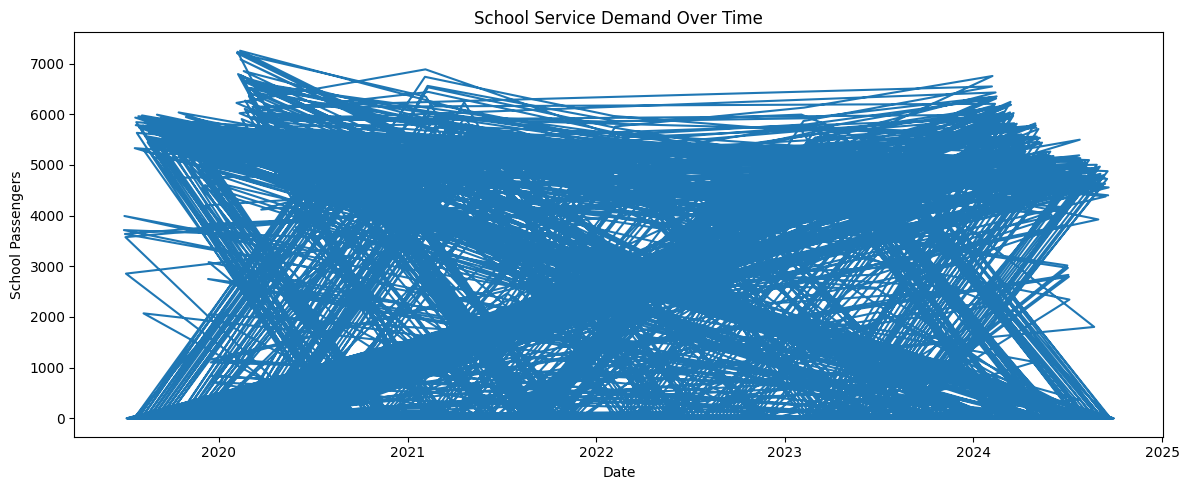

In [201]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['School'])
plt.title("School Service Demand Over Time")
plt.xlabel("Date")
plt.ylabel("School Passengers")
plt.tight_layout()
plt.show()

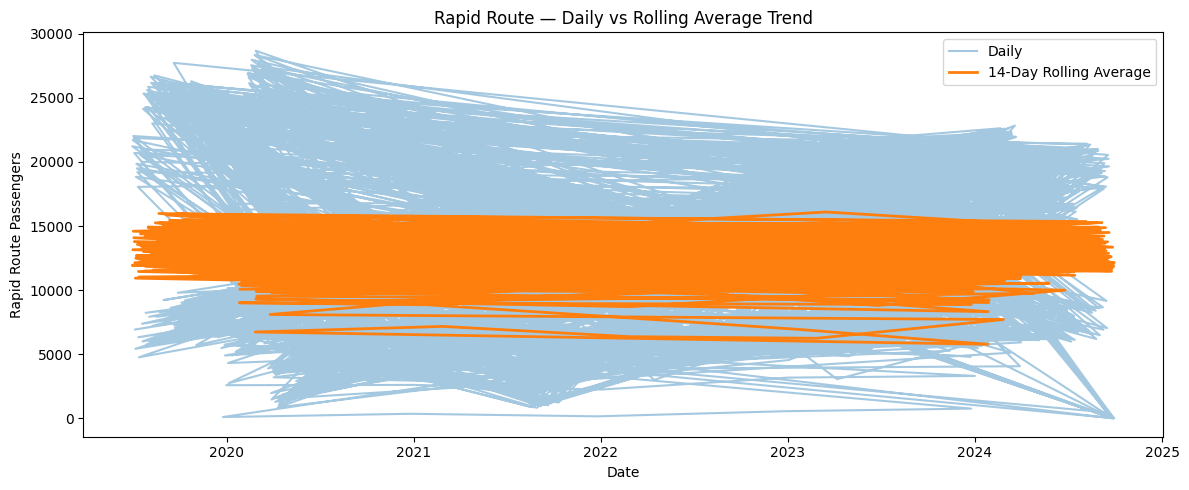

In [208]:
df['Rapid_Rolling'] = df['Rapid Route'].rolling(window=14).mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Rapid Route'], alpha=0.4, label="Daily")
plt.plot(df.index, df['Rapid_Rolling'], linewidth=2, label="14-Day Rolling Average")
plt.title("Rapid Route — Daily vs Rolling Average Trend")
plt.xlabel("Date")
plt.ylabel("Rapid Route Passengers")
plt.legend()
plt.tight_layout()
plt.show()